In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_age_price = pd.read_csv('/content/car_age_price.csv')


# Data inspection

In [3]:
#Size of Dataframe
car_age_price.shape

(112, 2)

In [4]:
#Data types of columns
car_age_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
#Get the last 4 rows of the dataset
car_age_price.tail(4)

,Year,Price
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [6]:
#check for null values
car_age_price.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
#check for duplicate values
car_age_price[car_age_price.duplicated(keep='first')]


,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [8]:
#removing duplicates
car_age_price.drop_duplicates(inplace=True)

In [9]:
#again check duplicates
car_age_price[car_age_price.duplicated(keep='first')]


,Year,Price


There are no duplicates values in the dataset

## Outlier Analysis

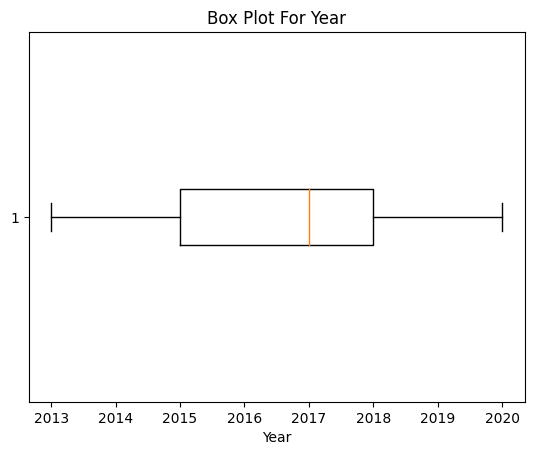

In [10]:
plt.boxplot(car_age_price['Year'], vert=False)
plt.xlabel('Year')
plt.title('Box Plot For Year')
plt.show()

## There are no  outliers present in the data.

# Find the best linear relationship between year and  price

# Pearson  correlation coefficients


In [22]:
import scipy.stats as stats
x_simple = car_age_price['Year']
y_simple = car_age_price['Price']
corr, _ = stats.pearsonr (x_simple, y_simple)
corr

0.8072755433020552

We can use the pearsonr function from the stats module to calculate the Pearson correlation coefficient between two variables Year and Price.
The pearsonr function returns two values, the correlation coefficient and a p-value, but only the correlation coefficient is assigned to the variable corr. The code prints the value of corr, which is approximately 0.807.
A value of 0.807 indicates a very strong positive correlation between Year and Price.

# Scatter Plot to find the line of best fit

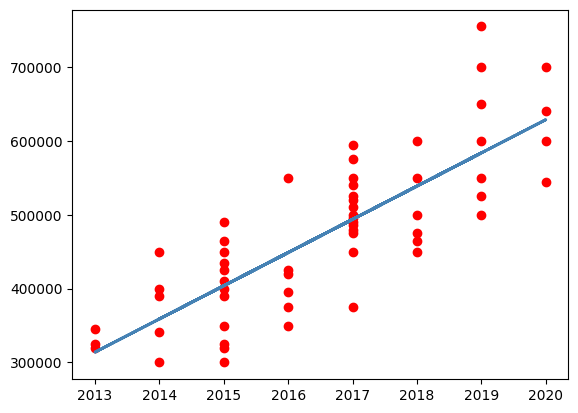

In [19]:
#define data
x = car_age_price['Year']
y = car_age_price['Price']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='red')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

Here, I plot Price (y) against Year (x).  In this Plot, we see that the value for "Price" does tend to increase as the "Year" increases. We can see an upward slope and a straight-line pattern in the plotted data points.The correlation between Year and Price is positive.

When the points on a scatterplot graph produce a lower-left-to-upper-right pattern, we say that there is a **positive correlation** between the two variables. This pattern means that when the score of one observation is high, we expect the score of the other observation to be high as well, and vice versa.

## Model Building
We first assign the feature variable, Year, in this case, to the variable X and the response variable, Price, to the variable y.

In [23]:
X=car_age_price.drop('Price', axis=1)
y=car_age_price.Price


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [26]:
# Let's now take a look at the train dataset
X_train.head()

,Year
77,2015
40,2019
59,2016
98,2020
99,2020


In [27]:
y_train.head()

77    325000
40    525000
59    550000
98    700000
99    600000
Name: Price, dtype: int64

# Building a Linear Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [29]:
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [30]:
print(lm.intercept_,lm.coef_)

-92605016.33591056 [46159.41256786]


# Can you predict the possible price of a 2022 model second-hand grand i10?

In [31]:
#Creating new dataset
x_new = pd.DataFrame({'Year': [2022] })
x_new.head()


,Year
0,2022


In [32]:
#calculation of sales price manually with Year=2022 using the formula y = mx + c
(46159.41256786*2022)+-92605016.33591056

729315.8763023615

In [38]:
new_pred=lm.predict(x_new)
new_pred

array([729315.87629543])

We get the same prediction equivalent to manual calc.

## Model Prediction

In [39]:
# lets predict on test data
pred=lm.predict(X_test)
pred

array([544678.22602402, 498518.81345615, 498518.81345615, 406199.98832044,
       360040.57575259, 498518.81345615, 406199.98832044, 313881.16318473,
       406199.98832044, 498518.81345615, 636997.05115972, 406199.98832044,
       406199.98832044, 406199.98832044, 544678.22602402, 544678.22602402,
       498518.81345615, 452359.40088829])

# Metrics

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Mean Squared Error:",sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error: 63270.10351857145


# Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

# Model Evaluation

In [41]:
# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",sqrt(mse))



Mean Squared Error: 63270.09879938467


As we can see that, there is a slight difference in the Mean Squared Error between  Lasso Regression and Linear Regression.Lower MSE values indicate better model accuracy. Therefore, lasso model is predicting better than  linear.